<a href="https://colab.research.google.com/github/AlejandroJuarez98/MLEARNING20/blob/master/CL04_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Regresión lineal.**

> - Es un modelo que explica la relación entre dos variables (x,y) y se representa con la siguiente formula.
>> y = $b_0$ + $b_1$ * x
>> - **y**: variable dependiente
>> - **x**: variable independiente
>> - $b_1$: Coeficiente
>> - $b_0$: Constante

- **Ejemplo**: Cambio de salario a traves de los años de experiencia. (Entender como afecta la experiencia el salario de las personas)
>> - **X**: Experiencia
>> - **Y**: Salario ($)

- $Salario$ = $b_0$ + $b_1$ * $experiencia$


In [49]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

#Importando dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/AlejandroJuarez98/MLEARNING20/master/Salary.csv')
dataset.columns = dataset.columns.str.lower()
dataset.head()

,experience,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [92]:
# Selección de datos con Pandas utilizando loc. (Más información: https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/)
print(dataset.loc[:5, ['experience']],'\n') # Accediendo a los datos por medio de índices numéricos
print(dataset.loc[dataset.salary < 56642], '\n') # Accediento a los datos por condición
print(dataset.loc[(dataset.experience == 2.0) & (dataset.salary == 43525)], '\n') # Accediento a los datos por condición multiple
print(dataset.loc[dataset.experience <= 3.0, ['salary']], '\n') # Accediento a datos por condición y columnas seleccionadas

dataset.loc[dataset.experience == 1.1, ['salary']] = [39300]
print(dataset.loc[dataset.experience == 1.1])

   experience
0         1.1
1         1.3
2         1.5
3         2.0
4         2.2
5         2.9 

    experience  salary
0          1.1   39300
1          1.3   46205
2          1.5   37731
3          2.0   43525
4          2.2   39891
7          3.2   54445
11         4.0   55794 

   experience  salary
3         2.0   43525 

[[39300]
 [46205]
 [37731]
 [43525]
 [39891]
 [56642]
 [60150]] 

   experience  salary
0         1.1   39300


In [90]:
# Selección de datos con Pandas utilizando iloc. (Más información: https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/)
print(dataset.iloc[:5,:-1], '\n') # Accediendo a los primeros 5 valores
print(dataset.iloc[:5, 1], '\n') # Accediendo a los primeros 5 valores de la columna de salarios
print(dataset.iloc[:5, 1].values, '\n') # obtener como lista los primeros 5 valores de la columna de salarios

   experience
0         1.1
1         1.3
2         1.5
3         2.0
4         2.2 

0    39300
1    46205
2    37731
3    43525
4    39891
Name: salary, dtype: int64 

[39300 46205 37731 43525 39891] 



In [99]:
# Creación de variables de nuestro modelo lineal
x = dataset.loc[:, ['experience']].values
y = dataset.iloc[:, 1].values

###**Divisón de dataset en conjunto de entrenamiento y conjunto de prueba**
- Para poder desarrollar machine learning utilizaremos la libería Sklearn. 
> - El **conjunto de entrenamiento** utiliza nuestro modelo a partir de las observaciones que ya sabemos.
> - El **conjunto de prueba** es donde se evalua el rendimiento de nuestro modelo en nuevas observaciones.

Se recomienda que nuestro modelo sea 80% entrenamiento 20% test.

In [106]:
from sklearn.model_selection import train_test_split # Dividir dataset en conjuntos
from sklearn.linear_model import LinearRegression  # Implementacion de modelo de regresión lineal

# Creación de conjuntos de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Entrenamiento de modelo de regresion lineal con el conjunto de entrenamiento
regressor = LinearRegression()
regressor.fit(x_train, y_train) # Ajuste de valores a modelo lineal

# Predicción de valores por conjunto de prueba
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_test)

[120058.71224314  88126.47661191  73454.90888945 118332.64545227
  97619.84396173  71728.84209857  63098.50814418]
[121872  91738  66029 122391 101302  67938  63218]


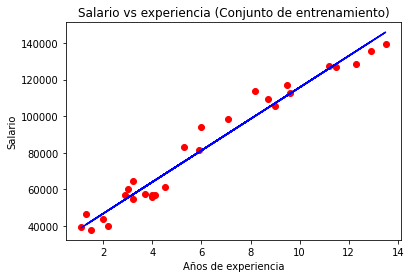

In [107]:
# Visualización de los resultados del conjunto de entrenamiento
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salario vs experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')

plt.show()

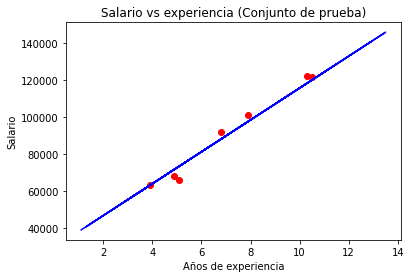

In [108]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salario vs experiencia (Conjunto de prueba)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')

plt.show()

In [110]:
# Constantes del modelo de regresión lineal.
array = numpy.array([[0], [5], [15]])
print(regressor.predict(array))

[ 29440.20572207  72591.87549401 158895.21503789]
